### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


Data Collection from the Nigerian Center for Disease Control

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [2]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import time

In [3]:
# Beautiful Soup intialization of url data to a DataFrame object.
start = time.time()
page_content = requests.get('https://covid19.ncdc.gov.ng/')
soup = BeautifulSoup(page_content.content, 'html.parser')
table = soup.find('table')
table_headers, table_rows = [], []
for i in table.thead.find_all('th'):
    title = i.text.strip()
    table_headers.append(title)
for j in table.tbody.find_all('tr'):
    for k in j.find_all('td'):
     table_rows.append(k.text.strip())
table_rows = np.array(table_rows).reshape(37, 5)
ncdc_data_from_soup = pd.DataFrame(table_rows, columns = table_headers)
print('Runtime speed for Beautiful Soup parsing: ', time.time()- start)

Runtime speed for Beautiful Soup parsing:  3.0302469730377197


In [4]:
""" start = time.time()
ncdc_data_from_pandas = pd.read_html('https://covid19.ncdc.gov.ng/')[0]
print('Runtime speed for Pandas parsing: ', time.time() - start)"""

" start = time.time()\nncdc_data_from_pandas = pd.read_html('https://covid19.ncdc.gov.ng/')[0]\nprint('Runtime speed for Pandas parsing: ', time.time() - start)"

In [5]:
#for Web Scrapping, the Beautiful Soup parsing is suitable given its functionality in Pandas
ncdc_data = ncdc_data_from_soup

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [6]:
daily_confirmed = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
daily_recovered = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
daily_death     = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [7]:
vulner_index = pd.read_csv(r"C:\Users\User\Desktop\covid_external.csv")
budget_data = pd.read_csv(r"C:\Users\User\Desktop\Budget data.csv")
gdp_data = pd.read_csv(r"C:\Users\User\Desktop\RealGDP.csv")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [8]:
print(ncdc_data.info())
ncdc_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB
None


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"103,835",692,"102,372",771
1,FCT,"29,360",220,"28,891",249
2,Rivers,"17,976",180,"17,641",155
3,Kaduna,"11,553",12,"11,452",89
4,Oyo,"10,329",0,"10,127",202
5,Plateau,"10,326",9,"10,242",75
6,Edo,"7,914",31,"7,561",322
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,707",425,"5,170",112
9,Kano,"5,337",170,"5,040",127


In [9]:
print(daily_confirmed.info())
daily_confirmed.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,196182,196404,196751,196870,196992,197066,197240,197434,197608,197788
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,331053,331191,331295,331384,331459,331540,331583,331601,331715,331810
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270551,270551,270570,270584,270599,270606,270609,270612,270612,270619
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46113,46113,46147,46147,46147,46147,46147,46147,46147,46147
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,8974,8974,9008,9008,9008,9008,9008,9008,9008,9008
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,9697763,9697763,9697763,9697763,9697763,9697763,9703938,9703938,9703938,9703938
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,439302,439302,439302,439302,439302,439302,439302,441444,441444,441444
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,203680,203680,203680,204471,204397,204397,204397,204397,204397,204397


In [10]:
print(daily_confirmed.info())
daily_confirmed.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
279,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,982846,982846,982846,982846,982846,982846,982846,984152,984152,984152
280,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,243970,243981,243993,244006,244023,244023,244023,244060,244072,244084
281,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,11921,11921,11930,11930,11937,11937,11937,11950,11950,11950
282,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,543832,543832,543930,544057,544090,544090,544210,544248,544270,544310
283,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,11441626,11444927,11448034,11450999,11454079,11456558,11458449,11460227,11463404,11465691
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702591,702591,702591,702768,702768,702768,702768,702768,702768,702768
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11932,11932,11932,11932,11932,11932,11932,11932,11932,11932
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333234,333274,333313,333337,333363,333375,333382,333387,333387,333439
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,256888,256904,256939,256939,256939,256988,256996,257090,257156,257156


In [11]:
print(daily_recovered.info())
daily_recovered.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.0+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(daily_recovered.info())
daily_recovered.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.0+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
264,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(daily_death.info())
daily_death.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7789,7791,7792,7792,7794,7794,7795,7796,7796,7796
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3585,3586,3586,3586,3586,3586,3586,3588,3589,3589
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6879,6879,6879,6879,6879,6879,6879,6879,6879,6879
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,145,145,145,145,145,145,145,145,145,145
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,129830,129830,129830,129830,129830,129830,129855,129855,129855,129855
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,8669,8669,8669,8669,8669,8669,8669,8679,8679,8679
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,125,125,125,125,125,125,125,125,125,125


In [14]:
print(daily_death.info())
daily_death.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 978 entries, Province/State to 9/21/22
dtypes: float64(2), int64(974), object(2)
memory usage: 2.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22
279,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,7462,7462,7462,7462,7462,7462,7462,7473,7473,7473
280,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637
281,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
282,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,5809,5809,5809,5809,5809,5809,5811,5812,5814,5814
283,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,43130,43132,43132,43137,43137,43138,43139,43141,43142,43146
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5706,5706,5706,5707,5707,5707,5707,5707,5707,5707
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,5596,5596,5596,5596,5596,5598,5598,5598,5598,5598


In [15]:
print(vulner_index.info())
vulner_index.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB
None


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [15]:
print(vulner_index.info())
vulner_index.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB
None


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
27,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
28,Ebonyi,South South,3192000,0.6,1.0,0.0,0.6,0.1,0.7,0.3,0.6,1.00
29,Bayelsa,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00
30,Cross river,South South,4272000,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98
31,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
32,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
33,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
34,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
35,Osun,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
36,Ekiti,South West,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03


In [16]:
print(gdp_data.info())
gdp_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [17]:
print(gdp_data.info())
gdp_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [18]:
print(budget_data.info())
budget_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [19]:
print(budget_data.info())
budget_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None


,states,Initial_budget (Bn),Revised_budget (Bn)
27,Ondo,187.80,151.4
28,Osun,119.60,82.2
29,Oyo,213.00,174.0
30,Plateau,177.30,122.0
31,Rivers,530.80,300.4
32,Sokoto,202.40,153.0
33,Taraba,215.00,150.5
34,Yobe,108.00,86.0
35,Zamfara,188.50,127.3
36,FCT,278.78,199.0


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [19]:
ncdc_data.head(4)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"103,835",692,"102,372",771
1,FCT,"29,360",220,"28,891",249
2,Rivers,"17,976",180,"17,641",155
3,Kaduna,"11,553",12,"11,452",89


In [20]:
ncdc_data = ncdc_data.rename(columns = {'States Affected': 'State', 'No. of Cases (Lab Confirmed)': 'Confirmed', 
                 'No. of Cases (on admission)': 'Admitted', 'No. Discharged': 'Discharged',
                 'No. of Deaths': 'Dead'})

In [21]:
ncdc_data

,State,Confirmed,Admitted,Discharged,Dead
0,Lagos,"103,835",692,"102,372",771
1,FCT,"29,360",220,"28,891",249
2,Rivers,"17,976",180,"17,641",155
3,Kaduna,"11,553",12,"11,452",89
4,Oyo,"10,329",0,"10,127",202
5,Plateau,"10,326",9,"10,242",75
6,Edo,"7,914",31,"7,561",322
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,707",425,"5,170",112
9,Kano,"5,337",170,"5,040",127


In [22]:
for column in ncdc_data.columns:
    if column != 'State':
        ncdc_data[column] = ncdc_data[column].apply(lambda x: int(x.replace(',', '')))

In [23]:
ncdc_data.head(5)

,State,Confirmed,Admitted,Discharged,Dead
0,Lagos,103835,692,102372,771
1,FCT,29360,220,28891,249
2,Rivers,17976,180,17641,155
3,Kaduna,11553,12,11452,89
4,Oyo,10329,0,10127,202


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [24]:
ng_daily_confirmed = daily_confirmed[daily_confirmed['Country/Region']=='Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis =1)
ng_daily_confirmed = ng_daily_confirmed.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_confirmed['Date'] = pd.to_datetime(ng_daily_confirmed['Date'])

In [25]:
ng_daily_confirmed[100:103]

,Date,Cases
100,2020-05-01,2170
101,2020-05-02,2388
102,2020-05-03,2558


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [26]:
ng_daily_recovered = daily_recovered[daily_confirmed['Country/Region']=='Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis =1)
ng_daily_recovered = ng_daily_recovered.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_recovered['Date'] = pd.to_datetime(ng_daily_recovered['Date'])

In [27]:
ng_daily_recovered[100:103]

,Date,Cases
100,2020-05-01,13220
101,2020-05-02,15013
102,2020-05-03,16639


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [28]:
ng_daily_death = daily_recovered[daily_death['Country/Region']=='Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis =1)
ng_daily_death = ng_daily_death.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_death['Date'] = pd.to_datetime(ng_daily_death['Date'])

In [29]:
ng_daily_death[100:103]

,Date,Cases
100,2020-05-01,13220
101,2020-05-02,15013
102,2020-05-03,16639


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [30]:
# outcome from testing, nlargest runs faster than sort_values()
max_confirmed = ncdc_data.iloc[ncdc_data['Confirmed'].nlargest(10).index] 

In [32]:
# theme setting for testing plots
theme = sns.color_palette('Greens_r', 20)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 15}
sns.set_context('paper', rc = paper_rc)

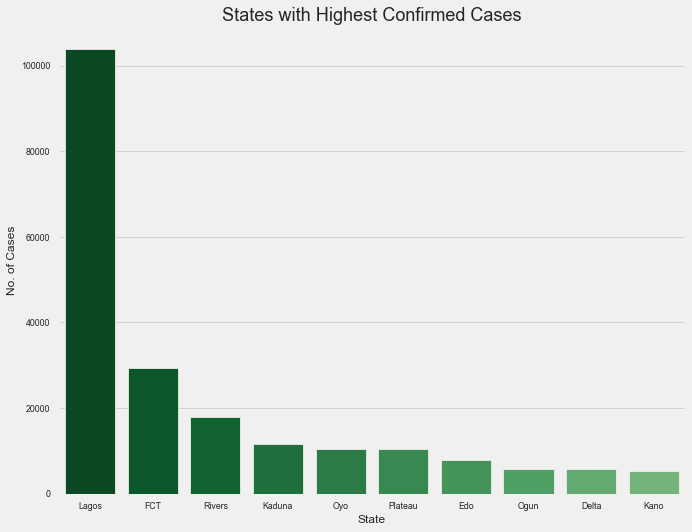

In [33]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Confirmed Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'Confirmed', data = max_confirmed, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Confirmed Cases.png', dpi = 300, transparent = True)

plt.show()

In [34]:
#The above plot indicates that Lagos has the highest number of cases in comparison to other states

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [35]:
#testing outcome, nlargest runs faster than sort sort_values()
max_discharged = ncdc_data.iloc[ncdc_data['Discharged'].nlargest(10).index]

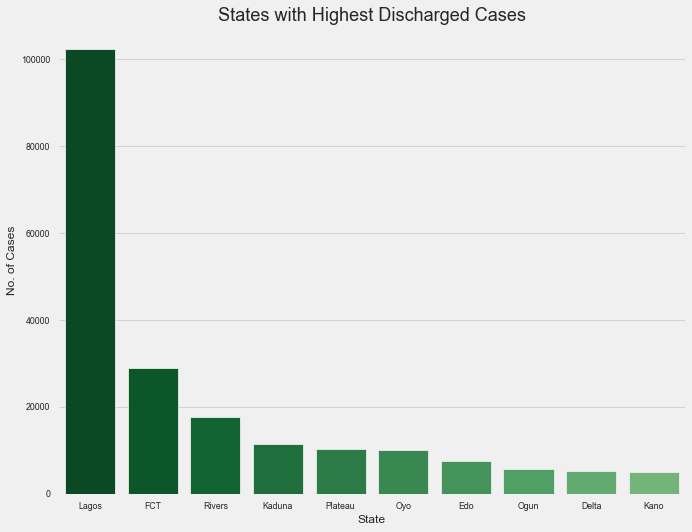

In [36]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Discharged Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'Discharged', data = max_discharged, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Discharged Cases.png', dpi = 300, transparent = True)

plt.show()

In [37]:
#The above plot indicates that Lagos has the highest number of discharged cases in comparison to other states

TODO D - Plot the top 10 Death cases

In [38]:
# After testing, nlargest runs faster than sort sort_values()
max_deaths = ncdc_data.iloc[ncdc_data['Dead'].nlargest(10).index]

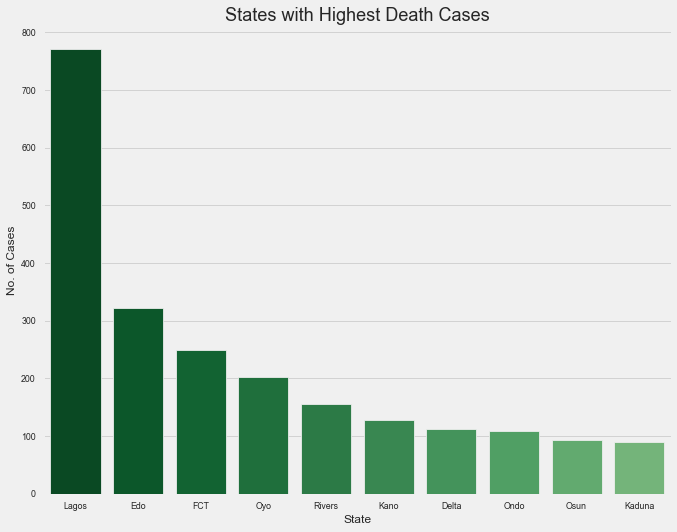

In [39]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Death Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'Dead', data = max_deaths, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Discharged Cases.png', dpi = 300, transparent = True)

plt.show()

In [40]:
#The above plot indicates that Lagos has the highest number of discharged cases in comparison to other states

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

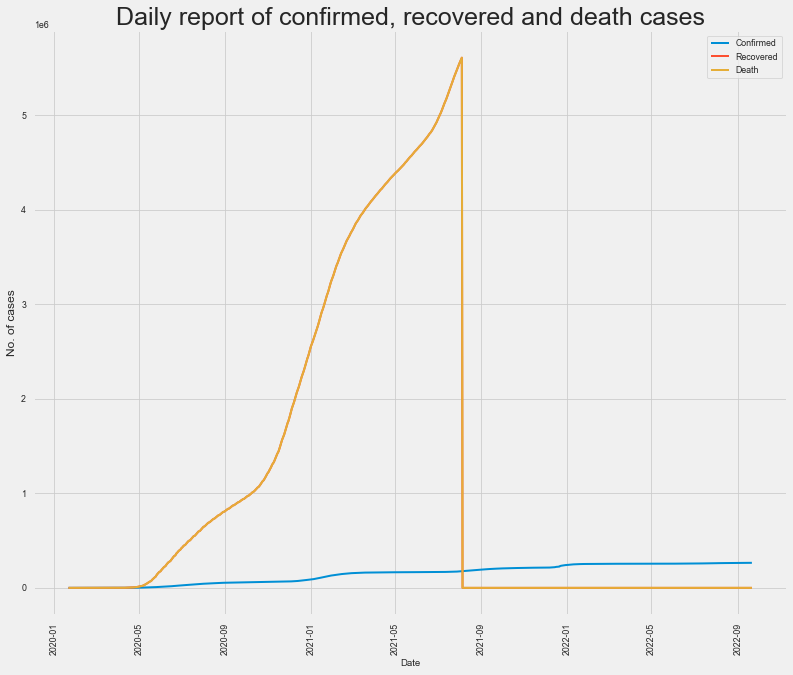

In [41]:
plt.figure(figsize = (12, 10))
plt.xticks(rotation = 90)
plt.ylabel('No. of cases', fontsize = 12)
plt.title('Daily report of confirmed, recovered and death cases', fontsize = 25)

sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_confirmed, label = 'Confirmed', linewidth = 2)
sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_recovered, label = 'Recovered', linewidth = 2)
sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_death, label = 'Death', linewidth = 2)

#plt.savefig('Daily report of Cases. png', dpi = 300, transparent = True)

plt.show()

In [42]:
#The above plot shows
#1. a steady rise in the number of confirmed case
#2. a spontaneous decline in the number of death from September
#3. a decline in the number of recorvered given the decline in confirmed cases 

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [43]:
daily_infection_rate = ng_daily_confirmed['Cases']. diff()

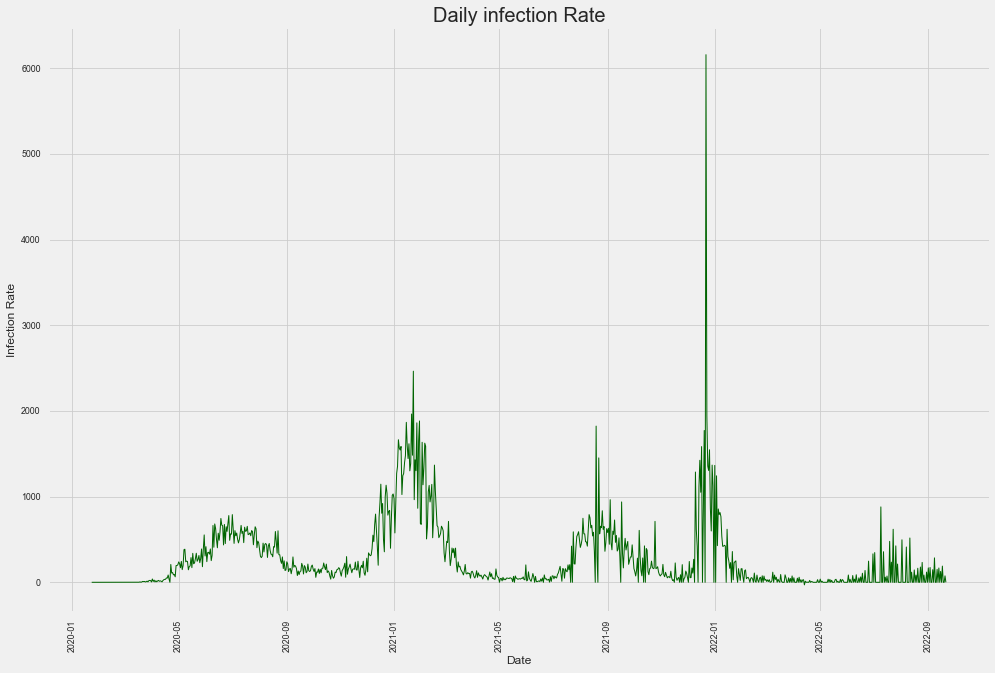

In [44]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 90)
plt.ylabel('Infection Rate', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Daily infection Rate', fontsize = 20)

sns.lineplot(x = ng_daily_confirmed.Date, y = daily_infection_rate, linewidth = 1, color = 'darkgreen', palette = theme)


#plt.savefig('Daily Infection Rate. png', dpi = 300, transparebt = True)

plt.show()

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [45]:
print('Maximum infectionrate: ', daily_infection_rate.max())

Maximum infectionrate:  6158.0


In [46]:
print('Maximum infection rate was recorde on: ', ng_daily_confirmed.max())

Maximum infection rate was recorde on:  Date     2022-09-21 00:00:00
Cases                 265008
dtype: object


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [47]:
vulner_index = vulner_index.rename(columns = {'states' : 'State'})

vulner_index['States'] = vulner_index['State'].replace('Abuja', 'Abuja')
vulner_index['State'].replace('Cross river', 'Cross River')

merged_data = ncdc_data.merge(vulner_index, on = 'State', how = 'left')

In [48]:
mini_merged_data = merged_data.iloc[merged_data['Confirmed'].nlargest(10).index]

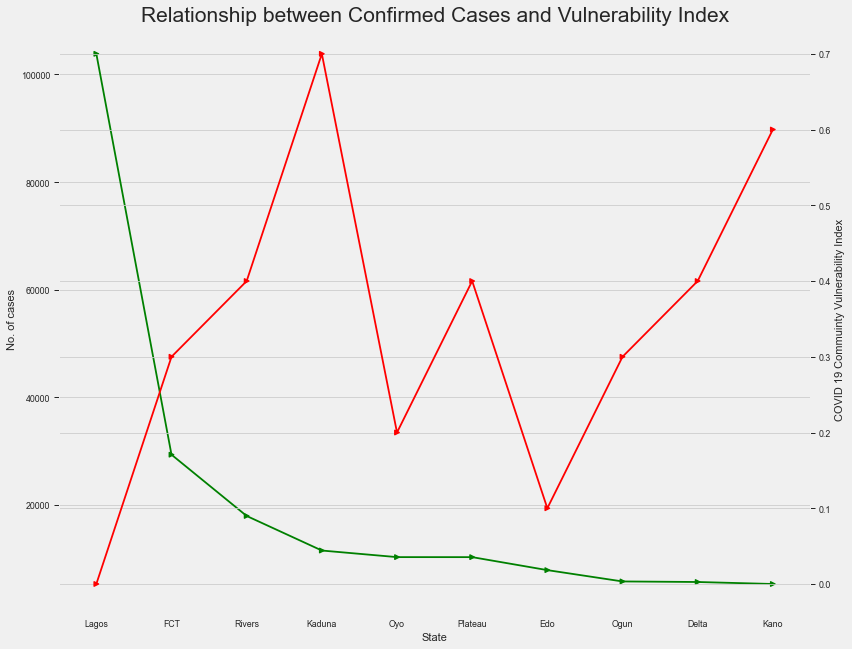

In [49]:
plt.figure(figsize = (12, 10))
plt.title('Relationship between Confirmed Cases and Vulnerability Index', fontsize = 21)

axis_1 = sns.pointplot(x = 'State', y = 'Confirmed', data = mini_merged_data, color = 'green', markers ='>')

plt.xlabel('State', fontsize =11)
plt.ylabel('No. of cases', fontsize = 11)

axis_2 = axis_1.twinx()

sns.pointplot(x = 'State', y = 'Overall CCVI Index', data = mini_merged_data, ax = axis_2, color = 'red', markers = '>')
 
plt.ylabel('COVID 19 Commuinty Vulnerability Index', fontsize = 11)

#plt.savefig('Confirmed Cases and Vulnerability Index.png', dpi = 300, transparent = True)

plt.show()

In [50]:
# Observation: The plot indicates an insignificant relationship between CCVI Index and COVID19 case confirmation. 
#By this, the confirmation of cases has not be proven to be the reason behind the index position by state
# For instance, states with the highest number of confirmed cases tend to be the least vulnerable as depicted in the plot above
# the question will now be what makes the correlation insignificant.


TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

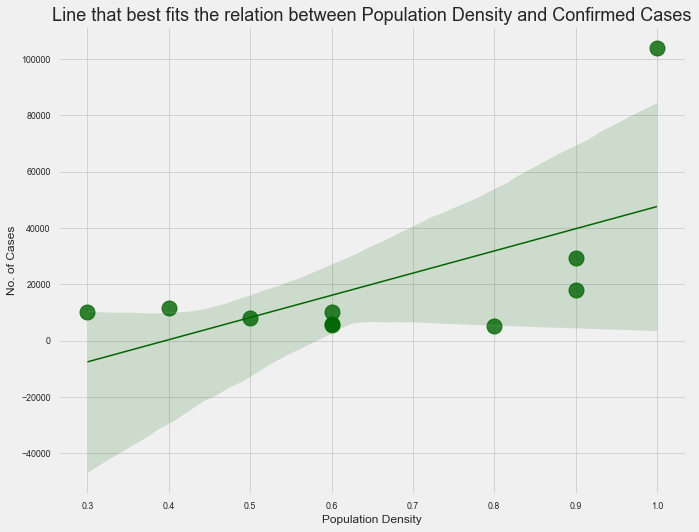

In [51]:
plt.figure(figsize=(10, 8))
plt.title('Line that best fits the relation between Population Density and Confirmed Cases', fontsize = 18)

sns.regplot(x = 'Population Density', y = 'Confirmed', data = mini_merged_data, color = 'darkgreen')

plt.ylabel('No. of Cases', fontsize = 12)
plt.xlabel('Population Density', fontsize = 12)

#plt.savefig('Regplot.png', dpi = 300, transparent = True)

plt.show()


In [57]:
# This plot shows a positive correlation between population density and confirmed cases of an area.
# Studied carefully though, the 'line of best fit' that sns.regplot() returns captures perfectly only one
# data point. This shows that the two features have at best a moderate correlation.
# This means that a city with high population per area will fairly likely have high COVID cases. 

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

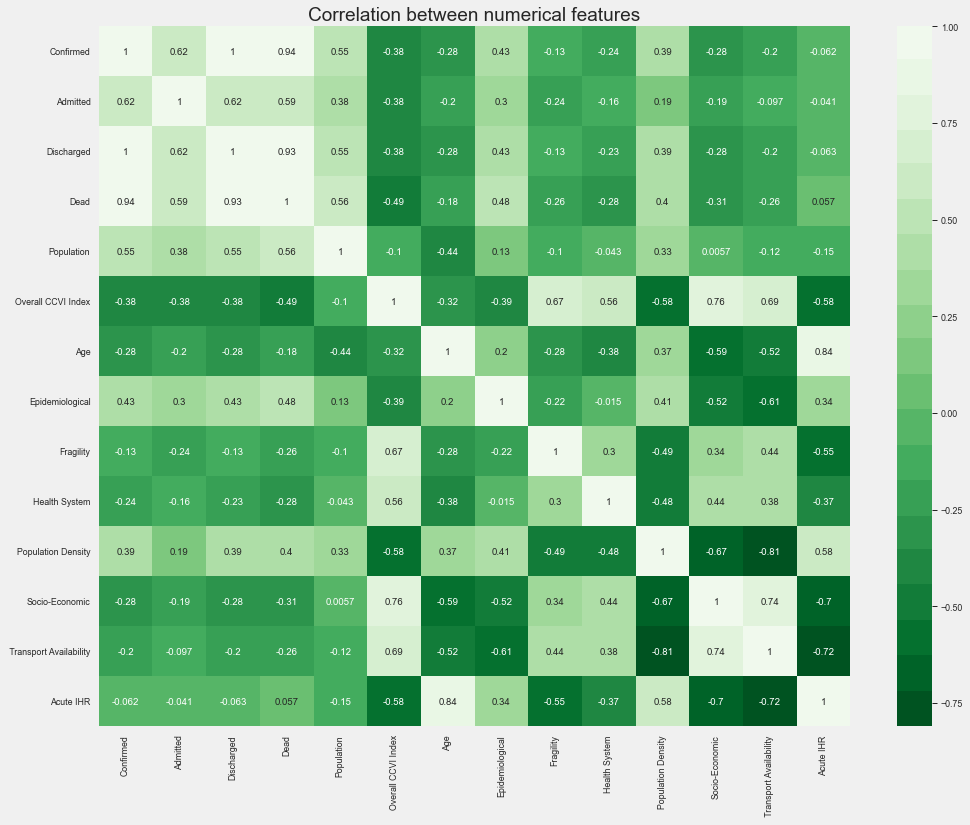

In [52]:
plt.figure(figsize = (15, 12))
plt.title('Correlation between numerical features', fontsize = 19)

sns.heatmap(merged_data.corr(), annot = True, cmap = theme, center = 0.1)

#plt.savefig('Correlation between numerical features.png', dpi = 300, transparent = True)

plt.show()


In [76]:
# The above plot shows the correlation degree between variables and inferences from this is as thus;

#1 Acute IHR and confirmed have a weak correlation
# The weak correlation indicates that a progression of either variable has no effect on the other

#2 socio-economic and age have a positive correlation
#  By this, the socio-economic advancement indicates the viability of a population with regards to the age of the populace

#3 The health system has a positive correlation with overall CCVI index
#  Here, the evidence of development in affects health facilitation and the overall well-being of the populace.

#4Transport availabity has positive correlation with overall CCVI index

# 5. Transport and Population Density (Very strong and negative)
#    This says transport systems get clogged when there is a higher concentration of people to an area.

# 6. Number of Admitted Cases and Transport Availability (Very weak and negative)
#    This says there is no relation between the quality of transport of a place to admitted cases.

# 7. Number of Confirmed Cases and Population (Strong and positive) 
#    The number of confirmed cases will definitely grow higher with population increase.


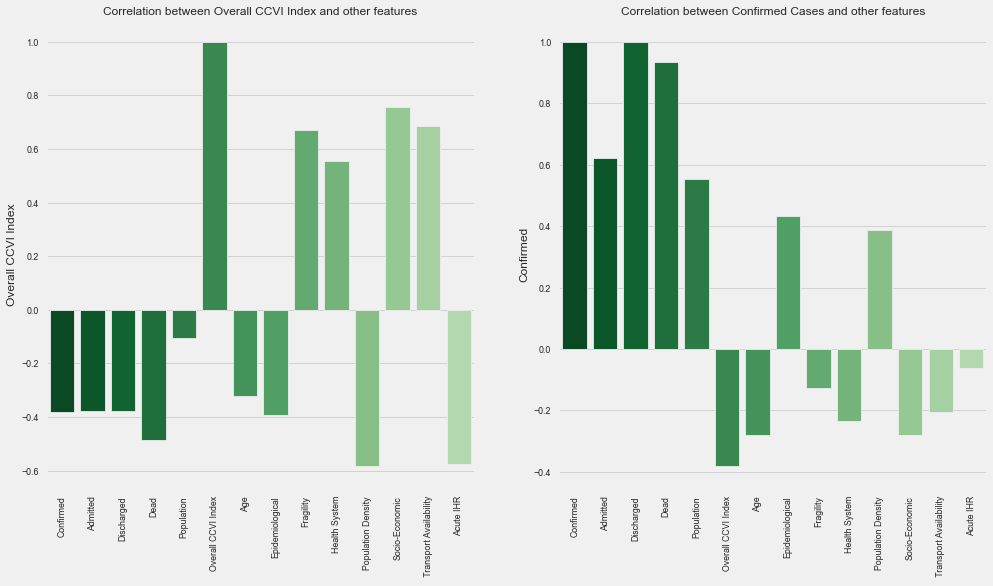

In [54]:
figure, axes = plt.subplots(1, 2, figsize = (15, 8))

xticklabels = axes[0].get_xticklabels()

axes[0].set_xticklabels(xticklabels, rotation = 90)
axes[0].set_title('Correlation between Overall CCVI Index and other features', fontsize = 12)
axes[0].set_ylabel('Overall CCVI Index', fontsize = 12)

axes[1].set_xticklabels(xticklabels, rotation = 90)
axes[1].set_title('Correlation between Confirmed Cases and other features', fontsize = 12)
axes[1].set_ylabel('No. of Cases', fontsize = 12)
sns.barplot(x = merged_data.corr().columns, y = merged_data.corr()['Overall CCVI Index'], ax = axes[0], palette = theme)
sns.barplot(x = merged_data.corr().columns, y = merged_data.corr()['Confirmed'], ax = axes[1], palette = theme)

#plt.savefig('Correlation between main features and others.png', dpi = 300, transparent = True)

plt.show()


In [55]:
# This plot shows the correlation between all other variables and the two main varibles (Vulnerability Index and Number of Confirmed Cases)# From it, we get the features that drive our main variables the most.

# For Overall CCVI Index we have Socio-Economic status, Transport, Fragility and Health System as the main drivers. This will be proven below
# by plotting their relationship.

# As for Number of Confirmed Cases, Population seems to be the biggest driver (This is not taking into consideration obvious drivers like
# Number of Admitted, Discharged and Dead patients). 


In [56]:
def plot_relation(m_feature, features):
    for feature in features:
        if feature != m_feature:                                                
            
            plt.figure(figsize = (15, 12))
            plt.title('Relationship between ' + m_feature + ' and ' + feature, fontsize = 20)

            axis_1 = sns.pointplot(x = 'State', y = m_feature, data = merged_data, color = 'darkorange')

            plt.xlabel('State', fontsize = 12)
            plt.ylabel(m_feature, fontsize = 12)
            plt.xticks(rotation = 90)

            axis_2 = axis_1.twinx()

            sns.pointplot(x = 'State', y = feature, data = merged_data, ax = axis_2, color = 'darkblue')
 
            #plt.savefig(str('Relationship between ' + m_feature + ' and ' + feature + '.png'), dpi = 300, transparent = True)
            
            plt.show()


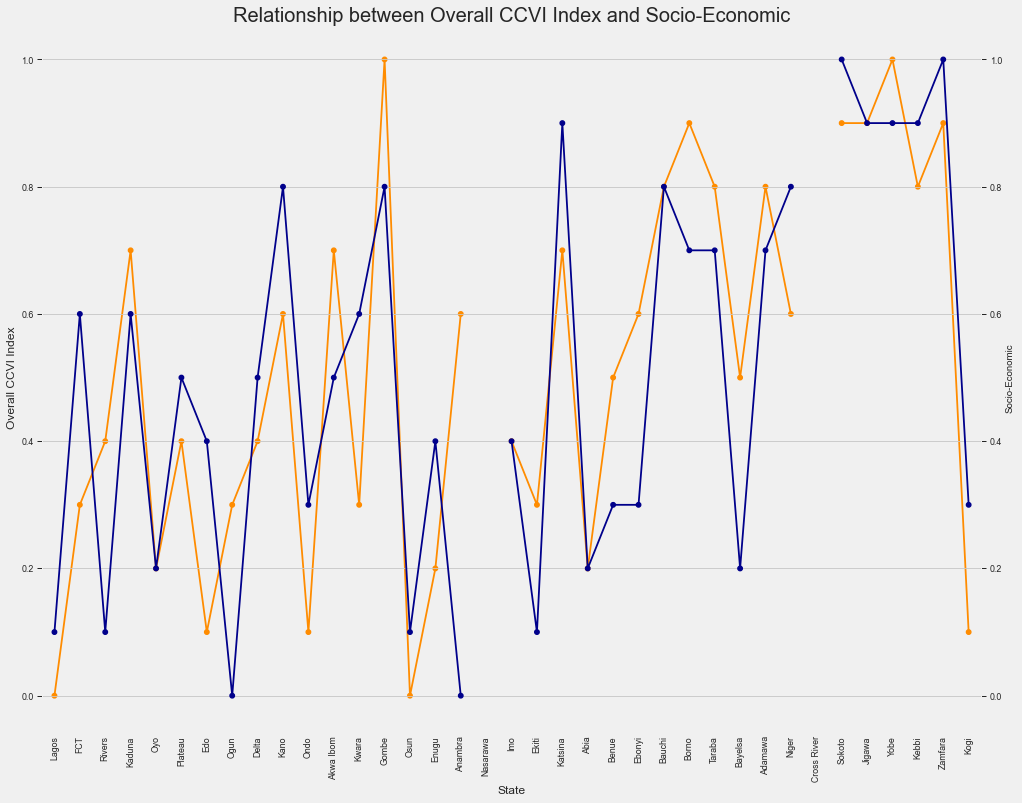

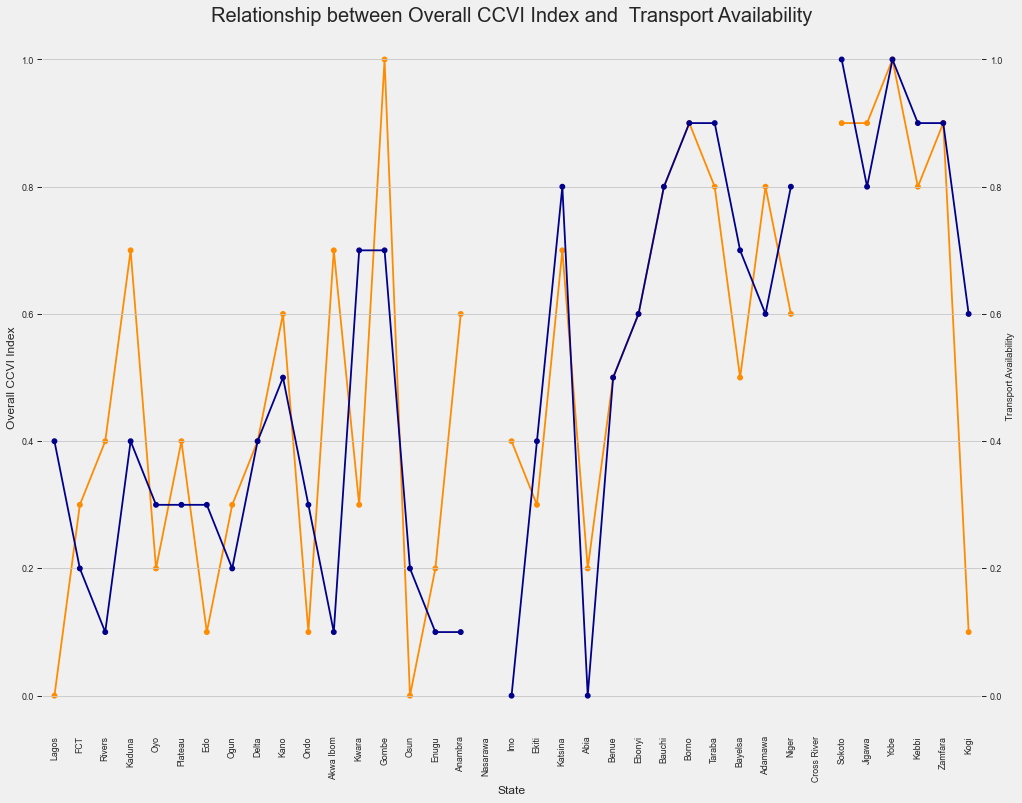

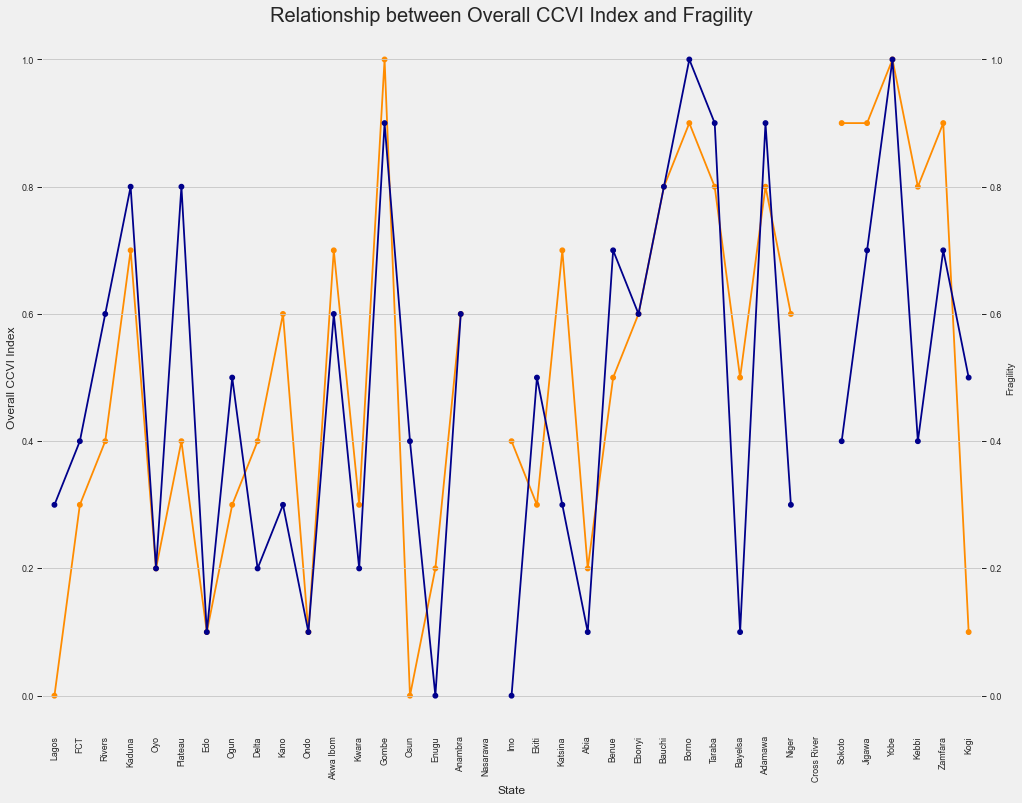

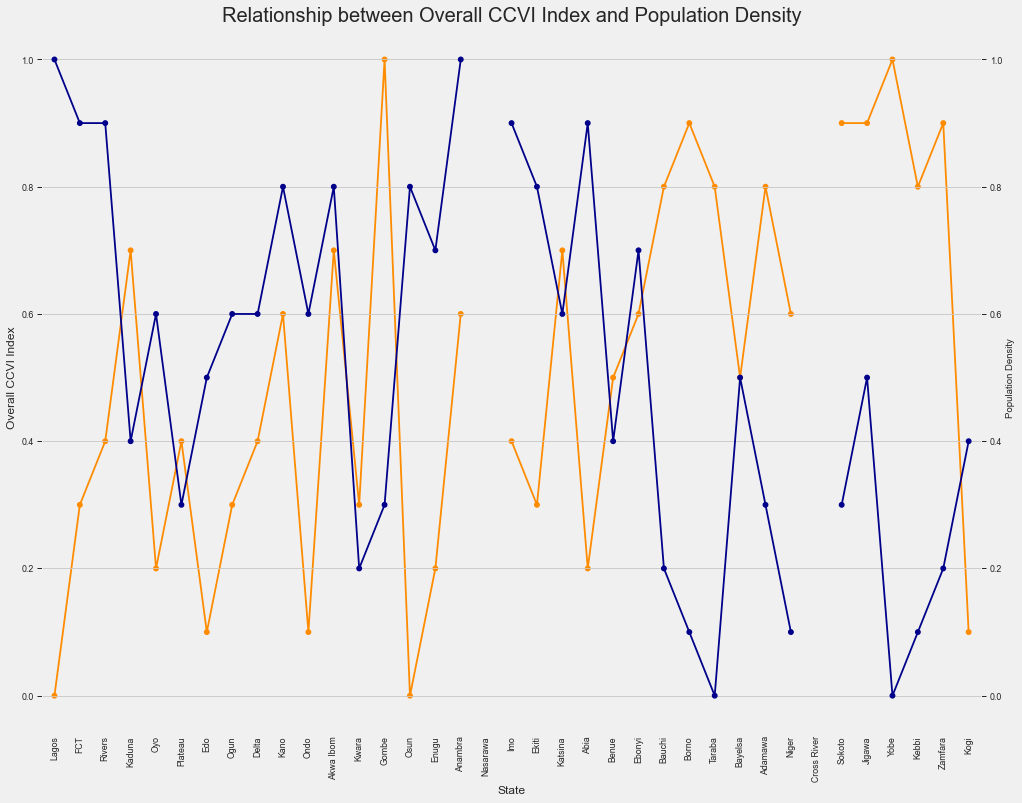

In [63]:
top_relating_features = merged_data.corr()['Overall CCVI Index'].abs().nlargest(5)
plot_relation('Overall CCVI Index', top_relating_features.index)


In [53]:
# The plot points closely tracking each other show very strong correlation to Vulnerability Index

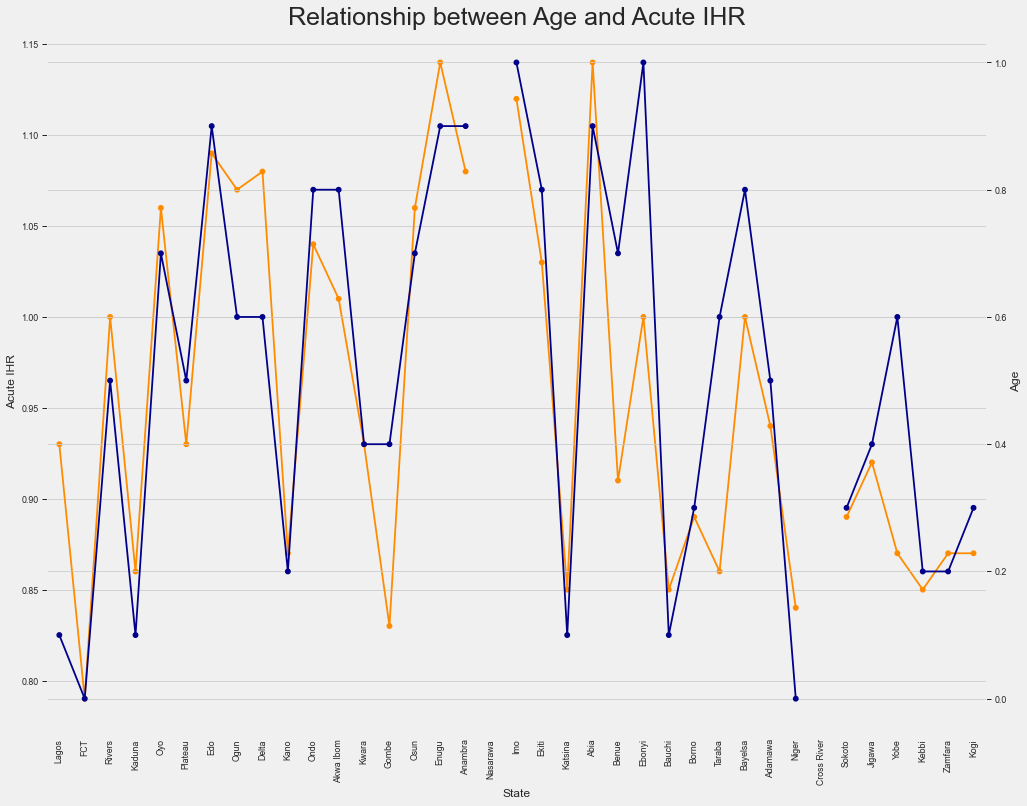

In [57]:
plt.figure(figsize = (15, 12))
plt.title('Relationship between Age and Acute IHR', fontsize = 25)

axis_1 = sns.pointplot(x = 'State', y = 'Acute IHR', data = merged_data, color = 'darkorange', markers = 'o')

plt.xlabel('State', fontsize = 12)
plt.ylabel('Acute IHR', fontsize = 12)
plt.xticks(rotation = 90)

axis_2 = axis_1.twinx()

sns.pointplot(x = 'State', y = 'Age', data = merged_data, ax = axis_2, color = 'darkblue', markers = 'o')

plt.ylabel('Age', fontsize = 12)

#plt.savefig('Relationship between Age and Acute IHR.png', dpi = 300, transparent = True)

plt.show()


In [58]:
# It is interesting to see the data conform strongly with the fact that the elderly in any place generally need greater health care than the youngsters. 

In [59]:
budget_data = budget_data.melt(id_vars = 'states', value_vars = ['Initial_budget (Bn)', 'Revised_budget (Bn)'], var_name = 'Budget Type', value_name = 'Budget Value')

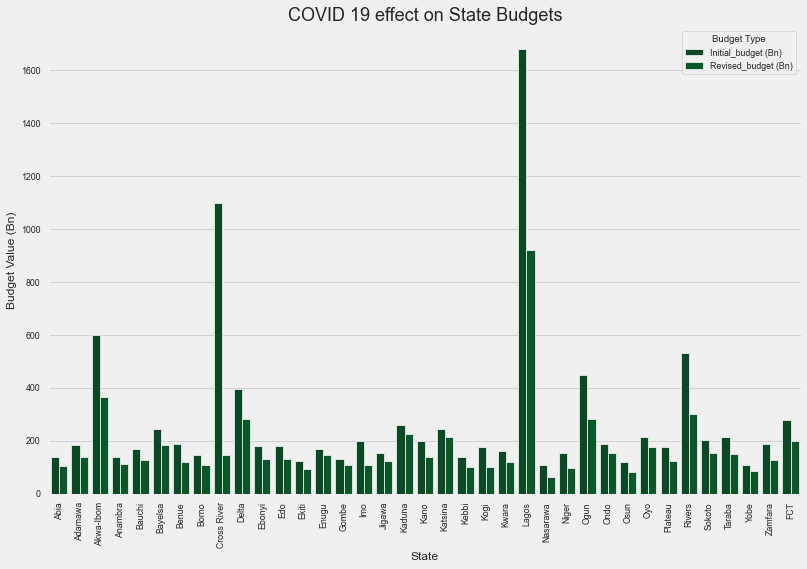

In [60]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
plt.title('COVID 19 effect on State Budgets', fontsize = 18)

sns.barplot(x = 'states', y = 'Budget Value', hue = 'Budget Type', data = budget_data, palette = theme)

plt.ylabel('Budget Value (Bn)', fontsize = 12)
plt.xlabel('State', fontsize = 12)

#plt.savefig('COVID 19 effect on State Budgets.png', dpi = 300, transparent = True)

plt.show()


In [61]:
# This plot shows how every state has had to revise its budget and probably allocate more to mitigating the effect of COVID 19.

In [62]:
percentages = merged_data['Confirmed'] / sum(merged_data['Confirmed'])

In [63]:
explode_mask = np.array([merged_data['Confirmed'] < 3000]).astype(int).reshape(37,) 

In [64]:
explode = []
for i in range(len(explode_mask)):
    if i > 0:
        explode.append(2 * (i / 30.0))
    else: explode.append(0)


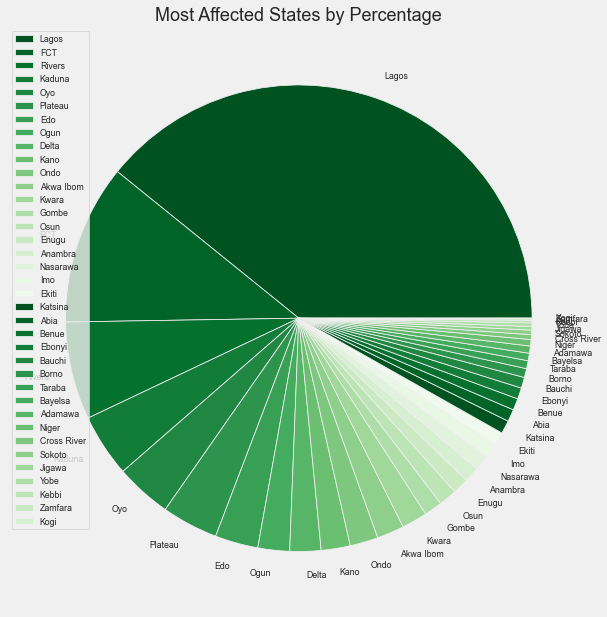

In [65]:
plt.figure(figsize = (12, 10))
plt.title('Most Affected States by Percentage', fontsize = 18)
plt.pie(percentages, labels = merged_data['State'], colors = theme)
plt.legend()
#plt.savefig('Most Affected States by Percentage', dpi = 500, transparent = True)
plt.show()


In [66]:
# This shows that Lagos State undoubtedly saw the biggest outburst of the virus. Followed by FCT, Rivers and Kaduna. It's no surprise that
# these cities are the most industrial in the country.


### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [67]:
gdp_data = gdp_data.melt(id_vars = 'Year', value_vars = ['Q1', 'Q2', 'Q3', 'Q4'], var_name = 'Quarter', value_name = 'GDP Value')

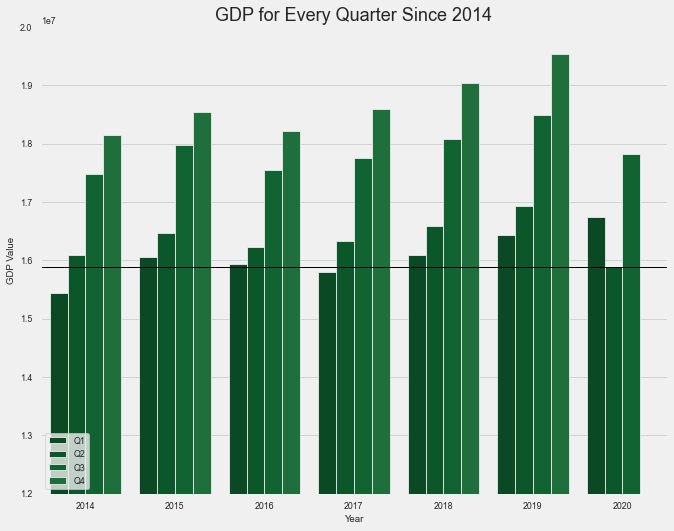

In [68]:
plt.figure(figsize = (10, 8))
plt.ylim(1.2e7, 2.0e7)
plt.title('GDP for Every Quarter Since 2014', fontsize = 18)
plt.axhline(gdp_data[gdp_data['Year'] == 2020][gdp_data['Quarter'] == 'Q2']['GDP Value'].values, color = 'black')

sns.barplot(x = 'Year', y = 'GDP Value', hue = 'Quarter', data = gdp_data, palette = theme)

plt.legend(loc = 'lower left')
#plt.savefig('GDP For Every Quarter Since 2014.png', dpi = 300, transparent = True)
plt.show()


In [69]:
# The plot shows a general trend of rising GDP over the quarters of every year except for the year 2020.
# In 2020, we see what seemed like it would be a great year given that it had the highest GDP in the last 6 years.
# This GDP took a massive hit in the beginning of the second quarter when the virus was first confirmed in the country (~ April, 2020)
# The second quarter GDP of 2020 was at an all time low.


### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [70]:
vaccinations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [71]:
ng_vaccinations = vaccinations[vaccinations['location'] == 'Nigeria']

In [72]:
ng_vaccinations = ng_vaccinations[['date', 'daily_vaccinations']]

In [73]:
ng_vaccinations[100:103]

,date,daily_vaccinations
83303,2021-06-12,39399.0
83304,2021-06-13,39399.0
83305,2021-06-14,39399.0


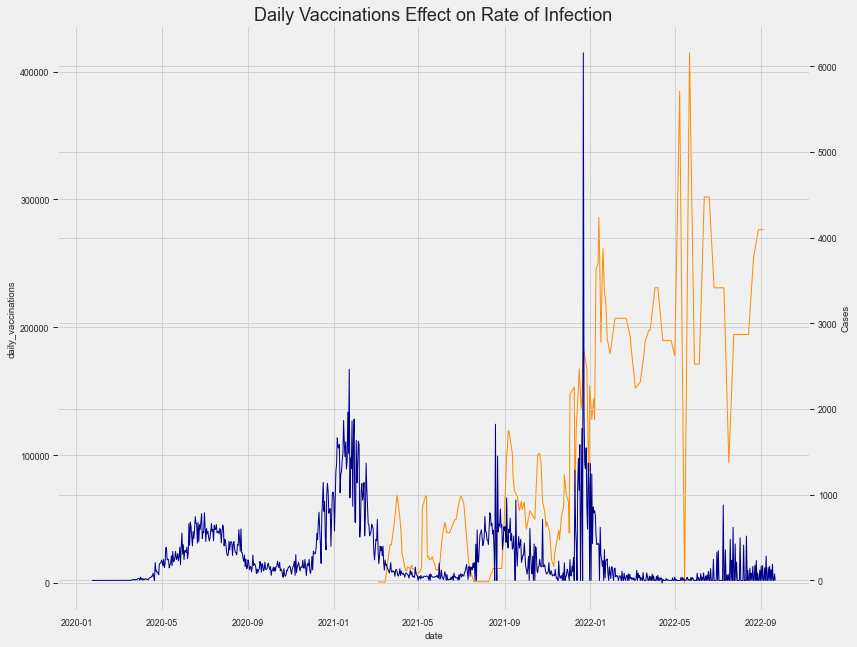

In [74]:
plt.figure(figsize = (12, 10))
plt.title('Daily Vaccinations Effect on Rate of Infection', fontsize = 18)

axis_1 = sns.lineplot(x = pd.to_datetime(ng_vaccinations['date']), y = ng_vaccinations['daily_vaccinations'], color = 'darkorange', markers = 'o')
axis_2 = axis_1.twinx()

sns.lineplot(x = ng_daily_confirmed.Date, y = daily_infection_rate, color = 'darkblue', markers = 'X')
#plt.savefig('Daily Vaccinations Effect on Rate of Infection', dpi = 300, transparent = True)

plt.show()


In [75]:
# The daily vaccinations rolled out (in orange) shows that vaccination is effective for curbing the spread of the virus. The massive spike in 
# vaccination caused a flattening of the curve which was the goal.

